In [1]:
import shutil
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import tensorflow_probability as tfp
import os 
import sys
import matplotlib.pyplot as plt
import pandas as pd
from pyDOE import lhs
%load_ext autoreload
%autoreload 2
import time

W0416 17:49:26.076484 139955762464512 deprecation.py:323] From /root/.local/lib/python3.5/site-packages/tensorflow/python/compat/v2_compat.py:61: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
Instructions for updating:
non-resource variables are not supported in the long term
W0416 17:49:26.138268 139955762464512 deprecation_wrapper.py:76] From /root/.local/lib/python3.5/site-packages/tensorflow_probability/python/layers/dense_variational_v2.py:151: The name convert_to_tensor is deprecated. Please use compat.v1.convert_to_tensor instead.

W0416 17:49:26.141358 139955762464512 deprecation_wrapper.py:76] From /root/.local/lib/python3.5/site-packages/tensorflow_probability/python/layers/initializers.py:27: The name keras.initializers.Initializer is deprecated. Please use compat.v1.keras.initializers.Initializer instead.

W0416 17:49:26.160043 139955762464512 deprecation_wrapper.py:76] From /root/.local/lib/pyt

In [2]:
tfm = tfp.models

In [3]:
inputs = np.loadtxt('./test_Data/X.txt')

In [4]:
outputs = np.loadtxt('./test_Data/Y.txt')

In [5]:
print(inputs.shape)

(100, 4)


In [6]:
labels = ['u1','u2', 'u3','u4']

In [7]:
model = tfm.BGP_model(inputs, outputs, kernel_type = 'RBF', noise_level = 1e-2, labels = labels)

W0416 17:49:30.750549 139955762464512 deprecation_wrapper.py:76] From /root/.local/lib/python3.5/site-packages/tensorflow_probability/python/distributions/transformed_distribution.py:255: The name constant is deprecated. Please use compat.v1.constant instead.



In [8]:
model_info = model.run_mcmc(mcmc_samples = 8000, num_leapfrog_steps = 3, estimate_noise = False, warm_up = True)

W0416 17:49:34.534728 139955762464512 deprecation_wrapper.py:76] From /root/.local/lib/python3.5/site-packages/tensorflow_probability/python/models/bayesgp/scripts/bayesiangp.py:175: The name Variable is deprecated. Please use compat.v1.Variable instead.

W0416 17:49:34.555758 139955762464512 deprecation_wrapper.py:76] From /root/.local/lib/python3.5/site-packages/tensorflow_probability/python/internal/distribution_util.py:1839: The name ones_like is deprecated. Please use compat.v1.ones_like instead.

W0416 17:49:34.630996 139955762464512 deprecation_wrapper.py:76] From /root/.local/lib/python3.5/site-packages/tensorflow_probability/python/bijectors/bijector.py:970: The name shape is deprecated. Please use compat.v1.shape instead.



Noise variance is fixed.
Excecuting the warmup.
Warmup: 
Warm-Up Iteration:   0 Acceptance Rate: 1.000
Warm-Up Iteration: 500 Acceptance Rate: 0.623
Warm-Up Iteration: 1000 Acceptance Rate: 0.613
Warm-Up Iteration: 1500 Acceptance Rate: 0.602
Warm-Up Iteration: 2000 Acceptance Rate: 0.602
Warm-Up Iteration: 2500 Acceptance Rate: 0.599
Warm-Up Iteration: 3000 Acceptance Rate: 0.592
Warm-Up Iteration: 3500 Acceptance Rate: 0.590
Warm-Up Iteration: 3999 Acceptance Rate: 0.589
Sampling in progress.


/root/.local/lib/python3.5/site-packages/tensorflow_probability/python/mcmc/sample.py:335: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn("Tracing all kernel results by default is deprecated. Set "
W0416 17:49:54.673107 139955762464512 deprecation.py:323] From /root/.local/lib/python3.5/site-packages/tensorflow_probability/python/models/bayesgp/scripts/bayesiangp.py:281: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.


Acceptance rate of the HMC sampling: 0.57


In [9]:
print(model_info)

{'samples': {'kernel_inverse_lengthscales': array([[1.4322542 , 0.21396402, 0.31457385, 2.0621567 ],
       [1.5622702 , 0.2105103 , 0.38948622, 1.247497  ],
       [0.9884362 , 0.32730752, 0.31497735, 2.9162095 ],
       ...,
       [1.4283457 , 0.142657  , 0.21942551, 1.5895046 ],
       [1.0516083 , 0.24760213, 0.20316407, 2.311801  ],
       [1.3816574 , 0.28135076, 0.36444718, 1.9003835 ]], dtype=float32), 'gp_constant_mean_function': array([-0.16008937,  0.11229287,  0.07776591, ...,  0.09881395,
        0.22234434,  0.18784592], dtype=float32), 'kernel_variance': array([0.5873272, 1.066932 , 0.4689079, ..., 1.5000577, 1.0706056,
       0.8106575], dtype=float32)}, 'kernel_type': 'RBF', 'noise_level': 0.01}


In [10]:
model = tfm.BGP_model(inputs, outputs, model_info = model_info, labels = labels)

/root/.local/lib/python3.5/site-packages/tensorflow_probability/python/models/bayesgp/scripts/bgpmodel.py:58: UserWarning: Retrieving model info from previous run. The inputs and outputs arrays must be the same as the previous run.
  warnings.warn("Retrieving model info from previous run. The inputs and outputs arrays must be the same as the previous run.")


In [11]:
model.plot_chains(directory_path  = './')

In [12]:
mean_pos, std_pos, samples = model.predict(inputs, with_point_samples = True)

In [13]:
lower = np.percentile(samples,2.5, axis = 0)
upper = np.percentile(samples,97.5, axis = 0)

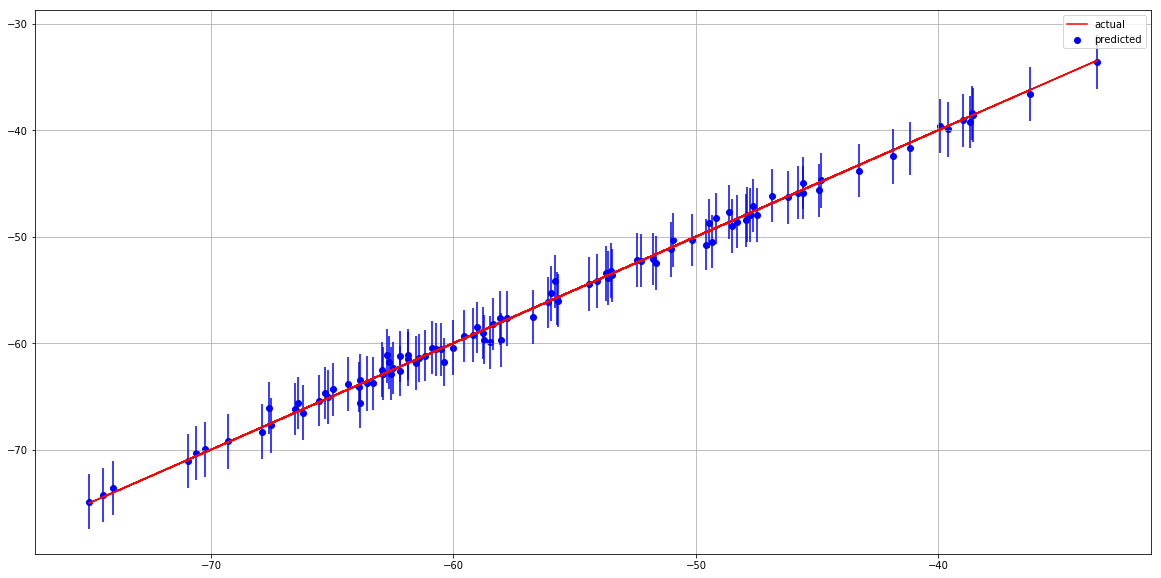

In [14]:
# Predicted vs actual
plt.figure(figsize =(20,10))
plt.plot(outputs, outputs , color = 'red', label ='actual')
plt.scatter(outputs, mean_pos, color = 'blue', label = 'predicted')
plt.vlines(outputs,lower, upper, color = 'blue')
plt.legend()
plt.grid()